

# First Exercise - Coregistration Quickbird and Worldview


The first exercise is to coregister two optical images.

commentaires...

In [10]:
%matplotlib notebook

In [1]:
!wget https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/QB.tif
!wget https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/WV.tif
  

--2022-01-13 11:35:20--  https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/QB.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11305510 (11M) [application/octet-stream]
Saving to: ‘QB.tif’

QB.tif              100%[===================>]  10,78M   501KB/s    in 22s     

2022-01-13 11:35:42 (499 KB/s) - ‘QB.tif’ saved [11305510/11305510]

--2022-01-13 11:35:42--  https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/WV.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8076400 (7,7M) [application/octet

Now you can begin by the import of the different images.

---



In [2]:
!ls

GEFOLKI_TP1.ipynb  GEFOLKI_TP2.ipynb  QB.tif  WV.tif


Read WV Image 



<IPython.core.display.Javascript object>


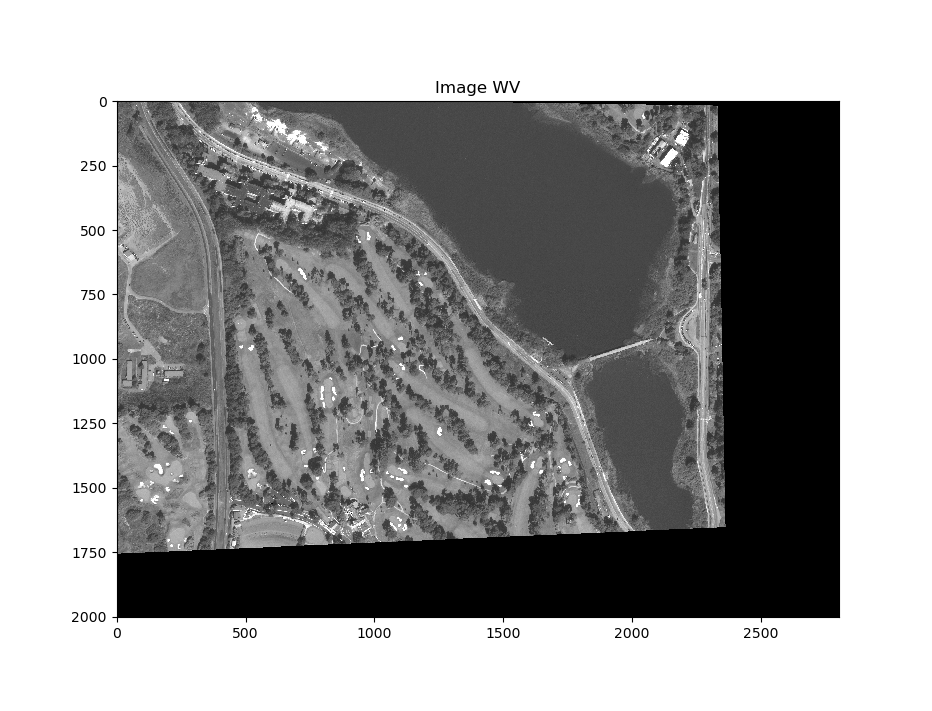

Read QB Image 



<IPython.core.display.Javascript object>


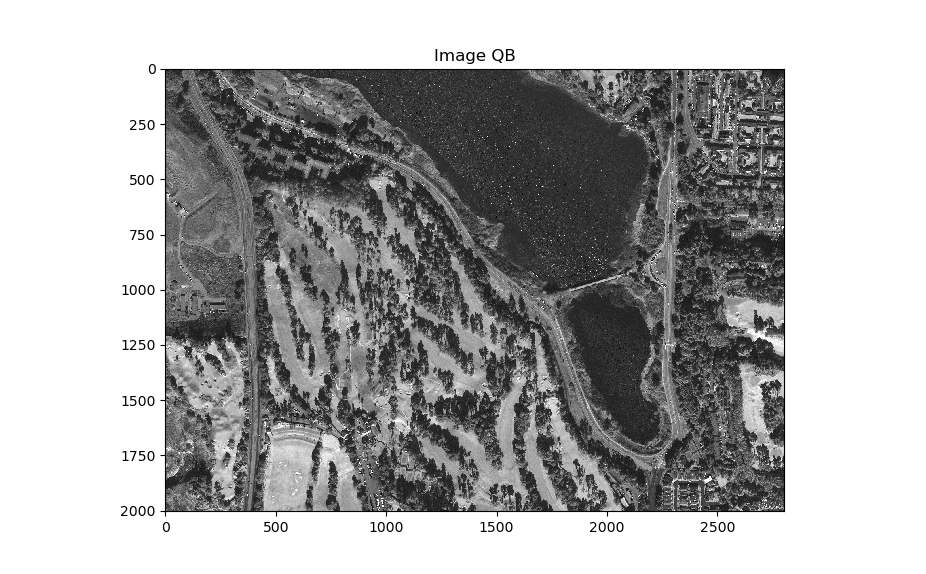

Text(0.5, 1.0, 'Image QB')

In [11]:
import numpy as np
from skimage.io import imread
import pylab as pl

print("Read WV Image \n")
WV = imread("WV.tif")
pl.figure()
pl.imshow(WV,vmin=0,vmax=700,cmap='gray')
pl.title('Image WV')

  
print("Read QB Image \n")
QB = imread("QB.tif")
pl.figure()
pl.imshow(QB,vmin=0,vmax=500,cmap='gray')
pl.title('Image QB')


The two images do not overlap.
It is then necessary to restrict the flow calculation to their common hold.
To do this, just calculate a mask that contains 0 everywhere where one of the images does not contain data, and apply it to both images.

In addition, the data must be converted to a float before calculating the flow.


In [4]:
mask = WV>0
	
WV = WV.astype(np.float32)
QB = QB.astype(np.float32)


WV=WV*mask
QB=QB*mask



# Flow computation
Once both data are prepared, we are ready to calculate the flow calculation. 
For that, we must clone the codes put on the github. This is simply done by the command line git clone .... * .git


In [5]:
!git clone https://github.com/aplyer/gefolki.git


Cloning into 'gefolki'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 344 (delta 2), reused 0 (delta 0), pack-reused 327
Receiving objects: 100% (344/344), 146.35 MiB | 1.43 MiB/s, done.
Resolving deltas: 100% (198/198), done.


We need to import the different functions .py that are used in the code. To this aim, the system need to add to the path of the python packages, the relative repository position of our codes (gefolki/python) 

In [6]:
import sys
sys.path.append('gefolki/python')
from algorithm import EFolki

Now, we choose the version we want to use: eFolki if data are homogeneous, GeFolki otherwise.
Here, the data is "homogeneous" (these are two optical data with little or no contrast inversion). Thus, we choose the eFolki version

In [7]:
u, v = EFolki(WV, QB, iteration=4, radius=[16,8], rank=4, levels=5)

u and v are two matrices containing horizontal component of the flow for the entire image, and vertical component of the flow, respectively.
IT is possible to plot the norm of the flow to visualize the displacement magnitude

<IPython.core.display.Javascript object>


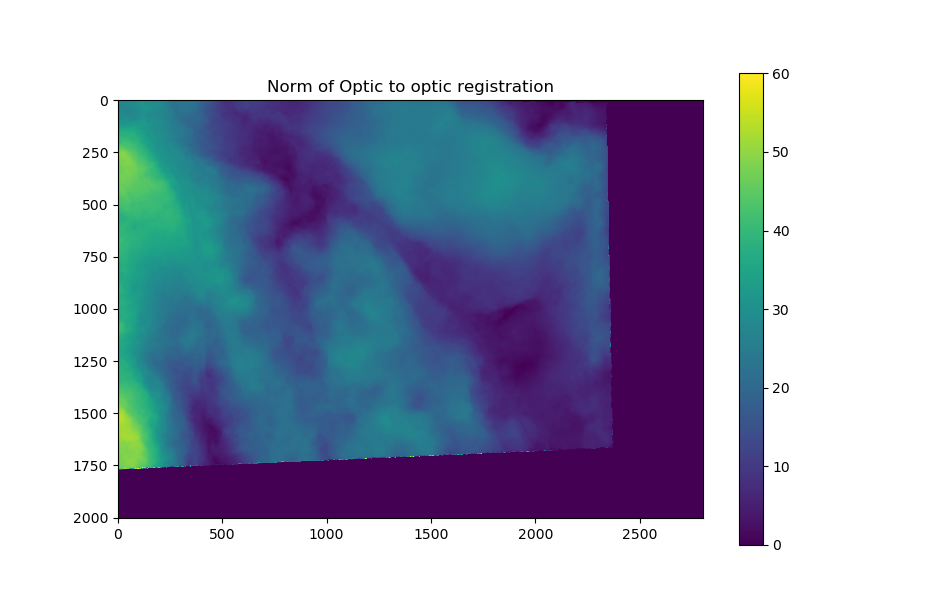

In [12]:
N = np.sqrt(u**2+v**2)
pl.figure()
pl.imshow(N,vmin=0,vmax=60)
pl.title('Norm of Optic to optic registration')
pl.colorbar()

# Resampling and VIsualization of the final result
Last step concerns re-samplng of the slave image according to the master one. To this aim, we use the function wrapData proposed in the tools.py file. 



<IPython.core.display.Javascript object>


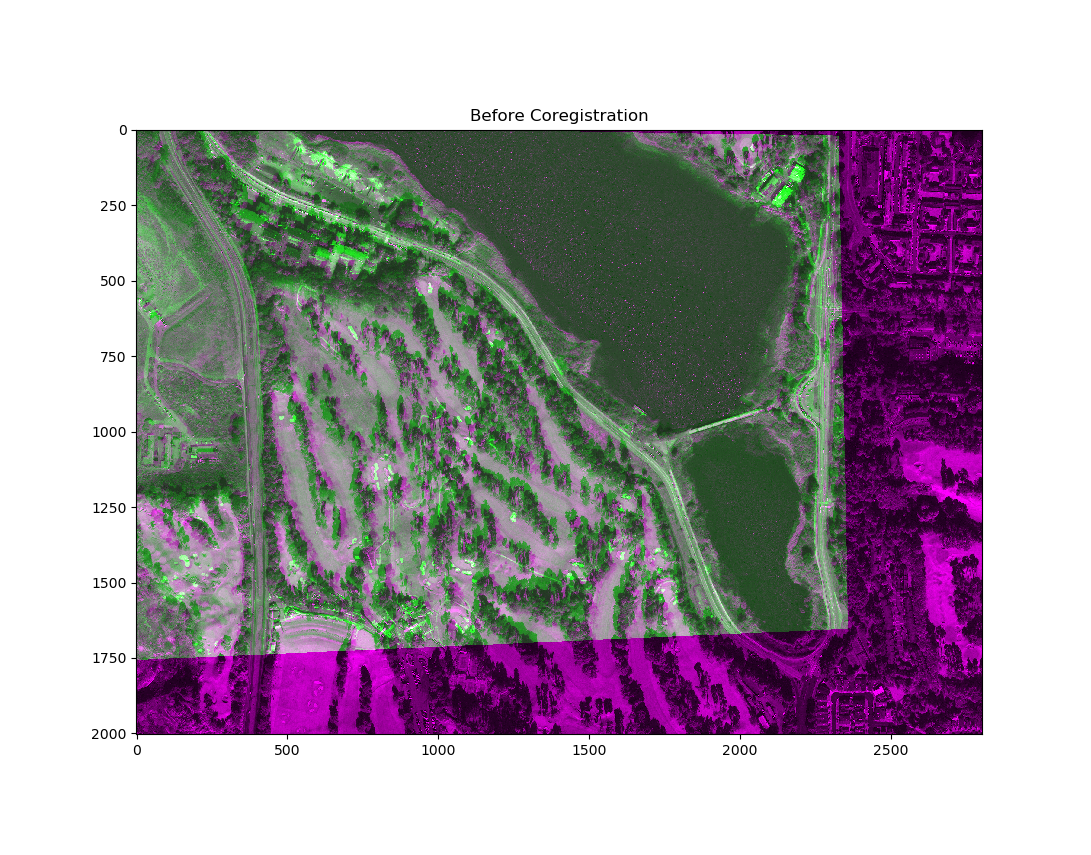

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<IPython.core.display.Javascript object>


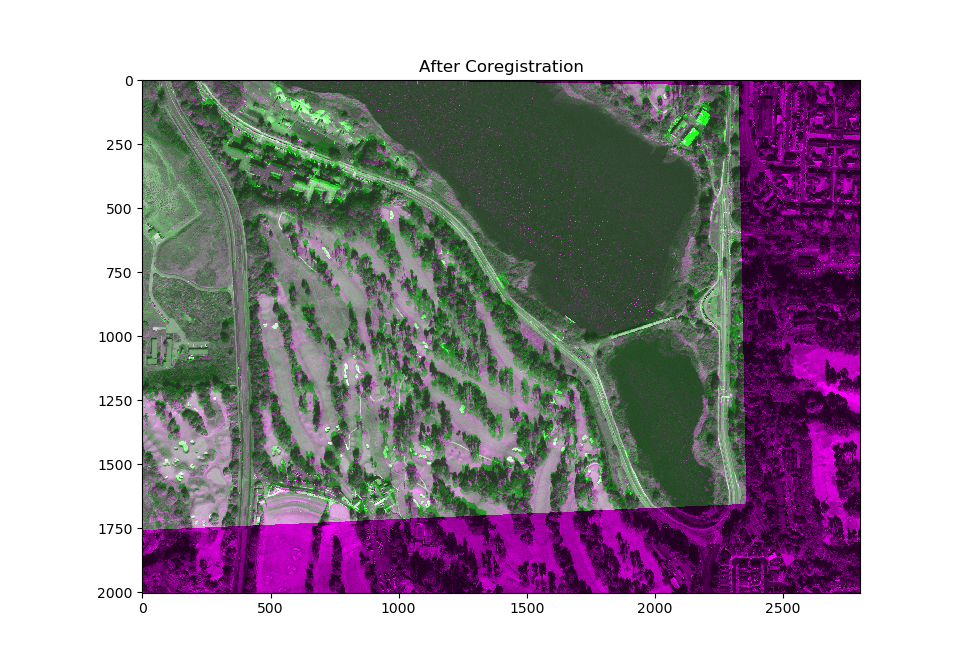

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'After Coregistration')

In [13]:
from tools import wrapData
QBrecalee = wrapData(QB, u, v)

QBaff = QB*mask
QBaff[QB>500]=500;
WVaff = WV*mask
WVaff[WV>700]=700;

C = np.dstack((QB/500, WV/700, QB/500))
pl.figure()
pl.imshow(C)
pl.title('Before Coregistration')

QBraff = QBrecalee
QBraff[QBrecalee>500]=500;
D = np.dstack((QBraff/500, WV/700, QBraff/500))
pl.figure()
pl.imshow(D)
pl.title('After Coregistration')

